In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image, pyplot

## 1.1 PCA: 2-dimensional Toy Data

In [2]:
df = pd.read_csv("data/pca-data-2d.dat.txt",sep="\s+",names=["A","B"])
df.head(3)

,A,B
0,2.4,-2.5
1,0.7,-0.5
2,2.9,-2.2


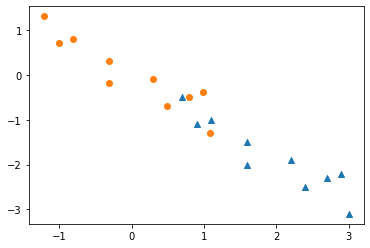

In [3]:
meanA = np.mean(df.iloc[:,0])
meanB = np.mean(df.iloc[:,1])
dfCenter = df.copy()
dfCenter.A = df.A - meanA
dfCenter.B = df.B - meanB
plt.scatter(df.A,df.B,marker='^')
axs = plt.scatter(dfCenter.A,dfCenter.B,marker='o')
plt.show()

[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


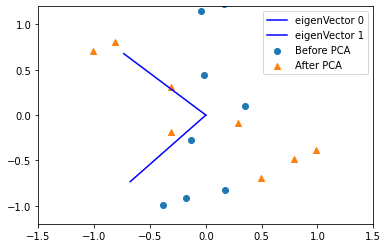

In [4]:
pca = np.array([dfCenter.A,dfCenter.B])
C = np.dot(pca,pca.T)
u,v = np.linalg.eigh(C)
pca_after = np.dot(v,pca)
axs = plt.scatter(pca_after[0],pca_after[1],label="Before PCA")
axs = plt.plot([0,v[0][0]],[0,v[0][1]],c='b',label="eigenVector 0")
axs = plt.plot([0,v[1][0]],[0,v[1][1]],c='b', label="eigenVector 1")
axs = plt.scatter(dfCenter.A,dfCenter.B,marker='^', label="After PCA")
plt.legend()
plt.xlim([-1.5,1.5])
plt.ylim([-1.2,1.2])
print(v)

[[-0.73517866  0.6778734 ]
 [ 0.6778734   0.73517866]]


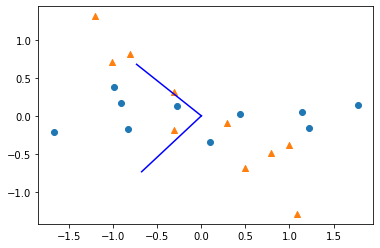

In [5]:
U = np.linalg.svd(C)
pca_svd = np.dot(U[0],pca)
axs = plt.scatter(pca_svd[0],pca_svd[1],label="Before PCA")
axs = plt.plot([0,v[0][0]],[0,v[0][1]],c='b',label="eigenVector 0")
axs = plt.plot([0,v[1][0]],[0,v[1][1]],c='b', label="eigenVector 1")
axs = plt.scatter(dfCenter.A,dfCenter.B,marker='^', label="After PCA")
print(U[0])

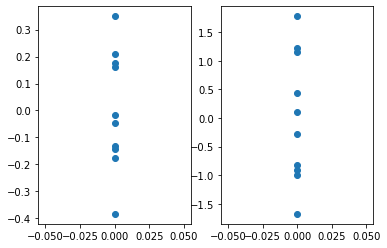

In [6]:
pca_first = np.dot(v[0],pca)
plt.subplot(1,2,1)
plt.scatter(np.zeros_like(pca_first),pca_first)
pca_second = np.dot(v[1],pca)
plt.subplot(1,2,2)
plt.scatter(np.zeros_like(pca_first),pca_second)

## 1.2 3-dimensional Toy Data

In [7]:
df_3d = pd.read_csv("data/pca-data-3d.txt")
df_3d.head(5)

,x,y,z
0,-0.194263,0.223524,-0.211130
1,0.020346,-0.380149,-0.990472
2,0.832259,3.054901,-2.725782
3,0.776873,1.540465,1.269721
4,-0.025527,0.064696,0.088624


(3, 500)


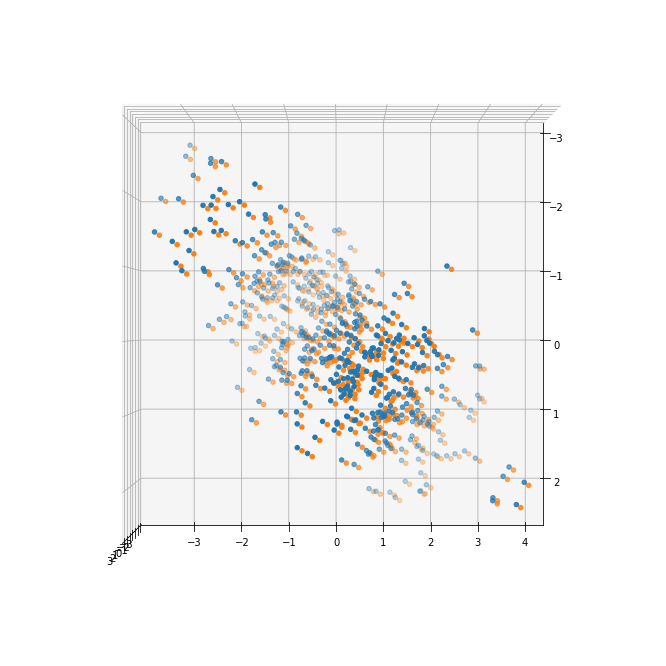

In [8]:
meanX = np.mean(df_3d.x)
meanY = np.mean(df_3d.y)
meanZ = np.mean(df_3d.z)

df_3d_center = np.array([df_3d.x-meanX,df_3d.y-meanY,df_3d.z-meanZ])
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_3d_center[0,:], df_3d_center[1,:], df_3d_center[2,:])
ax.scatter(df_3d.x, df_3d.y, df_3d.z)
ax.azim = 0
#ax.dist = 51.25
ax.elev = 90
print(df_3d_center.shape)

(-4.0, 4.0)

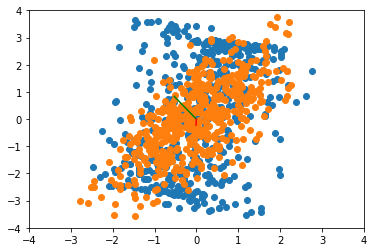

In [41]:
C_3d = np.dot(df_3d_center,df_3d_center.T)
u,v = np.linalg.eigh(C_3d)
df_3d_pca = np.dot(v[-2:],df_3d_center)
plt.scatter(df_3d_pca[0],df_3d_pca[1])
plt.scatter(df_3d_center[0],df_3d_center[1])
plt.plot([0,v[-2,0]],[0,v[-2,1]],c='g')
plt.plot([0,v[-1,0]],[0,v[-1,1]],c='r')
plt.xlim([-4,4])
plt.ylim([-4,4])

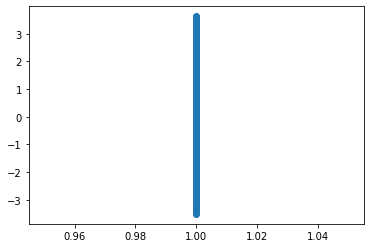

In [35]:
df_3d_pca_1 = np.dot(v[-1],df_3d_center)
plt.scatter(np.ones_like(df_3d_pca_1),df_3d_pca_1)

## H1.3

In [142]:
data = pd.read_csv("data/expDat.txt")
data = data.iloc[:,1:]
data = data.T
mean = np.asarray(data.mean(axis=1)).reshape(-1,1)
data = data - mean
print(data.shape)

(20, 100)


In [143]:
C = np.dot(data,data.T)
C.shape

(20, 20)

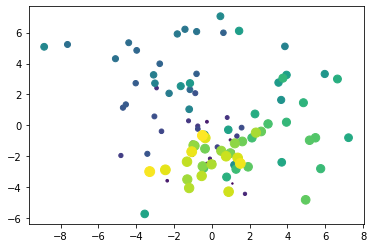

In [144]:
u,v = np.linalg.eigh(C)
c = [i for i in range(data.shape[1])]
data_2 = np.dot(v[-2:,:],data)
plt.scatter(data_2[0,:],data_2[1,:],c=c,s=c)

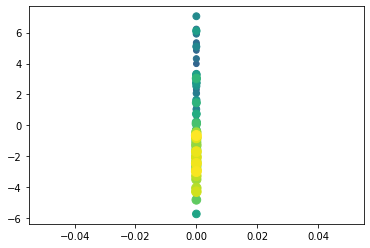

In [145]:
data_1_2 = np.dot(v[-1,:],data)
plt.scatter(np.zeros_like(data_1_2),data_1_2,c=c,s=c)

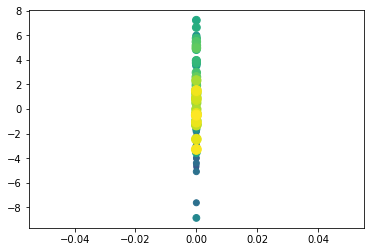

In [146]:
data_1_1 = np.dot(v[-2,:],data)
plt.scatter(np.zeros_like(data_1_1),data_1_1,c=c,s=c)

In [78]:
data_shuffle = np.copy(data)
np.random.shuffle(data_shuffle)

(20, 100)


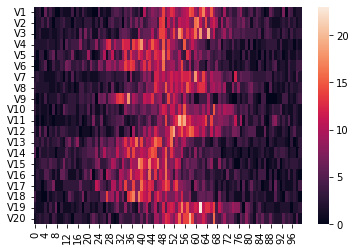

In [79]:
sns.heatmap(data)
print(data.shape)

<AxesSubplot:>

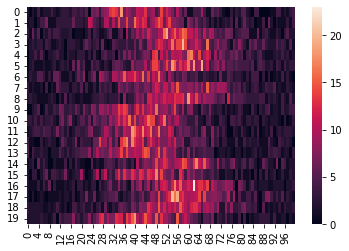

In [81]:
sns.heatmap(data_shuffle)

In [119]:
imgs_n = []
for i in range(1,11):
    img = image.imread("data/imgpca/n"+str(i)+".jpg")
    img = img.reshape((1,-1))
    for i in range(500):
        patch = np.random.choice(img[0],256)
        imgs_n.append(patch)
imgs_n = np.asarray(imgs_n).reshape((256,-1))
imgs_n.shape

(256, 5000)

In [120]:
imgs_b = []
for i in range(1,11):
    img = image.imread("data/imgpca/b"+str(i)+".jpg")
    img = img.reshape((1,-1))
    for i in range(500):
        patch = np.random.choice(img[0],256)
        imgs_b.append(patch)
imgs_b = np.asarray(imgs_b).reshape((256,-1))
imgs_b.shape

(256, 5000)

In [152]:
imgs_n_mean = imgs_n.mean(axis=1)
imgs_n_mean = imgs_n_mean.reshape(-1,1)
imgs_n_center = imgs_n - imgs_n_mean
imgs_n_center.shape

(256, 5000)

In [153]:
imgs_b_mean = imgs_b.mean(axis=1)
imgs_b_mean = imgs_b_mean.reshape(-1,1)
imgs_b_center = imgs_b - imgs_b_mean
imgs_b_center.shape

(256, 5000)

In [159]:
C_n = np.dot(imgs_n_center.T,imgs_n_center)
u,v = np.linalg.eigh(C_n)
#imgs_n_pca = np.dot(imgs_n_center,v[-4:,:])
v.shape

(5000, 5000)

In [172]:
imgs_n_pca = np.dot(imgs_n_center,v[:,:])
imgs_n_pca = imgs_n_pca.reshape(16,16,5000)
imgs_n_pca.shape

(16, 16, 5000)

/home/pan/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


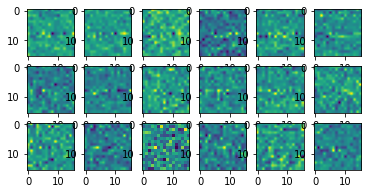

In [173]:
for i in range(4):
    for j in range(6):
        plt.subplot(4,6,4*i+j+1)
        pyplot.imshow(imgs_n_pca[:,:,4*i+j])

/home/pan/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


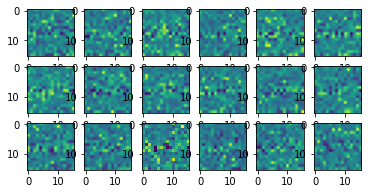

In [174]:
imgs_n_center_plot = imgs_n_center.reshape(16,16,-1)
for i in range(4):
    for j in range(6):
        plt.subplot(4,6,4*i+j+1)
        pyplot.imshow(imgs_n_center_plot[:,:,4*i+j])